In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my_data = pd.read_csv('Students Performance Dataset (1).csv')


In [4]:
my_data.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,49.963720,74.78305,71.652097,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,28.989785,14.54243,7.230097,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,25.075000,61.97000,66.533875,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,49.600000,74.54000,71.696250,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,75.500000,87.63000,76.711625,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.00000,95.091500,30.000000,10.000000,9.000000


In [5]:
my_data.isna().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

Text(0.5, 1.0, 'Grade Distribution')

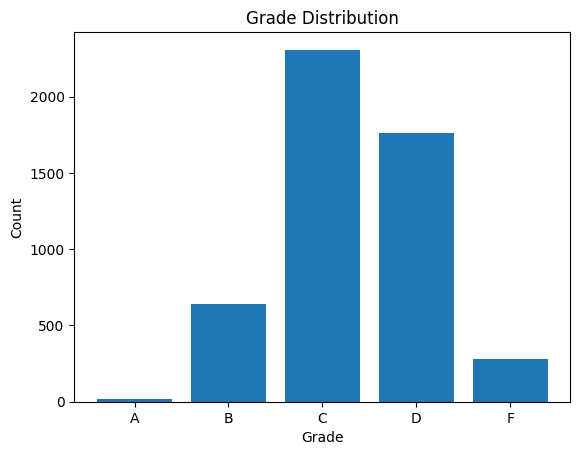

In [15]:
grade_counts = my_data['Grade'].value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

In [ ]:

target = pd.Series(np.nan, index=my_data.index)

# Base mapping
target[grades.isin(['D', 'F'])] = 0  # Dropout
target[grades.isin(['A', 'B'])] = 2  # Graduate
target[grades == 'C'] = 1  # Enrolled


# Plot distribution
label_lookup = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
target_counts = target.map(label_lookup).value_counts().sort_index()

plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Distribution (Dropout/Enrolled/Graduate)')

Text(0.5, 1.0, 'Target Distribution (Dropout/Enrolled/Graduate)')

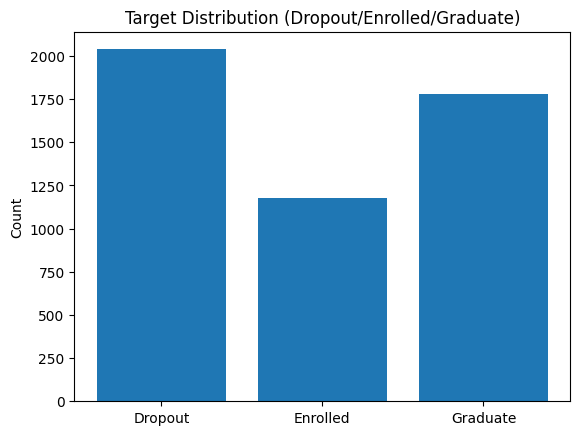

In [42]:
import numpy as np

# Derive target labels using same logic as transfer_learning_semantic.py
grades = my_data['Grade'].astype(str).str.upper()
stress = my_data['Stress_Level (1-10)']

target = pd.Series(np.nan, index=my_data.index)

# Base mapping
target[grades.isin(['D', 'F'])] = 0  # Dropout
target[grades.isin(['A', 'B'])] = 2  # Graduate
target[grades == 'E'] = 1  # Enrolled

# Grade C depends on stress level
c_mask = grades == 'C'
target[c_mask & (stress > 5)] = 1  # High stress C → Enrolled
target[c_mask & (stress <= 5)] = 2  # Low stress C → Graduate

# Plot distribution
label_lookup = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
target_counts = target.map(label_lookup).value_counts().sort_index()

plt.bar(target_counts.index, target_counts.values)
plt.ylabel('Count')
plt.title('Target Distribution (Dropout/Enrolled/Graduate)')

Text(0.5, 1.0, 'Target Distribution without splitting C grade')

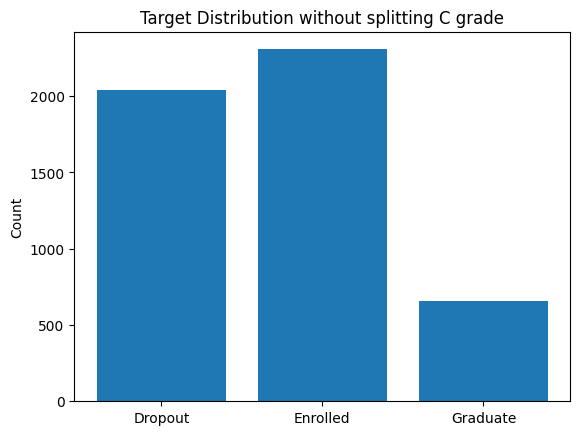

In [41]:
target = pd.Series(np.nan, index=my_data.index)

# Base mapping
target[grades.isin(['D', 'F'])] = 0  # Dropout
target[grades.isin(['A', 'B'])] = 2  # Graduate
target[grades == 'C'] = 1  # Enrolled


# Plot distribution
label_lookup = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
target_counts = target.map(label_lookup).value_counts().sort_index()

plt.bar(target_counts.index, target_counts.values)
plt.ylabel('Count')
plt.title('Target Distribution without splitting C grade')

Correlation between Grade and Quizzes Average: 0.19


Text(0.5, 0, 'Quizzes Average')

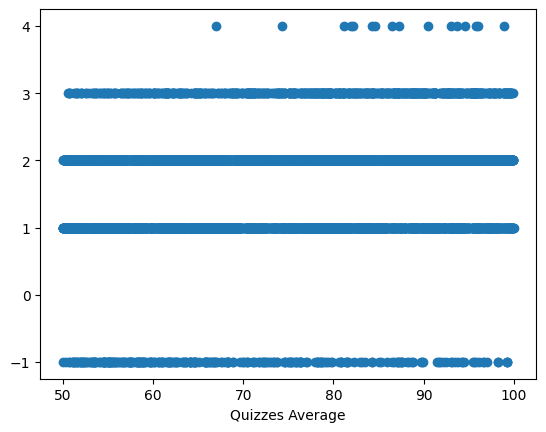

In [ ]:
correlation_grade_quiz = my_data['Quizzes_Avg'].corr(my_data['Grade'].map({'A':4, 'B':3, 'C':2, 'D':1, 'E':0, 'F':-1}))
print(f"Correlation between Grade and Quizzes Average: {correlation_grade_quiz:.2f}")

scatter = plt.bubble.scatter(my_data['Quizzes_Avg'], my_data['Grade'].map({'A':4, 'B':3, 'C':2, 'D':1, 'E':0, 'F':-1}))
plt.xlabel('Quizzes Average')

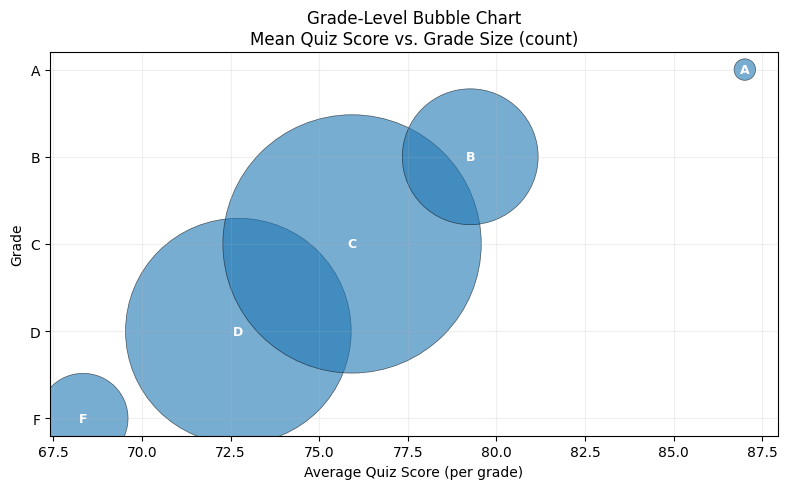

In [32]:
grade_to_numeric = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}

# Aggregate mean quiz score and count per grade
agg = (
    my_data.groupby('Grade')
    .agg(mean_quiz=('Quizzes_Avg', 'mean'), count=('Grade', 'size'))
    .reindex(sorted(grade_to_numeric.keys(), reverse=True))
    .dropna(subset=['mean_quiz'])
)

# Map grade to numeric y-position
agg['grade_numeric'] = agg.index.map(grade_to_numeric)

# Bubble sizes proportional to counts
bubble_sizes = agg['count'] * 15

plt.figure(figsize=(8, 5))
plt.scatter(
    agg['mean_quiz'],
    agg['grade_numeric'],
    s=bubble_sizes,
    alpha=0.6,
    edgecolor='k',
    linewidth=0.5
)

# Annotate each bubble with grade label
for grade, row in agg.iterrows():
    plt.text(row['mean_quiz'], row['grade_numeric'], grade, ha='center', va='center', fontsize=9, color='white', fontweight='bold')

plt.yticks(list(grade_to_numeric.values()), list(grade_to_numeric.keys()))
plt.xlabel('Average Quiz Score (per grade)')
plt.ylabel('Grade')
plt.title('Grade-Level Bubble Chart\nMean Quiz Score vs. Grade Size (count)')
plt.grid(alpha=0.2)
plt.tight_layout()

<Figure size 800x500 with 0 Axes>

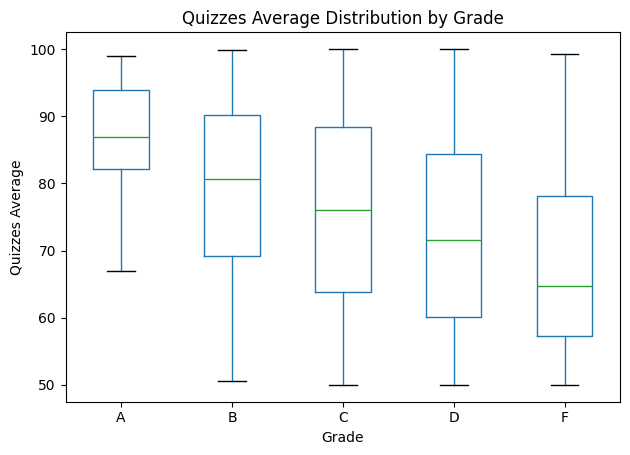

In [36]:
plt.figure(figsize=(8, 5))
box = my_data.boxplot(column='Quizzes_Avg', by='Grade', grid=False)
plt.title('Quizzes Average Distribution by Grade')
plt.suptitle('')  # remove automatic pandas title
plt.xlabel('Grade')
plt.ylabel('Quizzes Average')
plt.tight_layout()

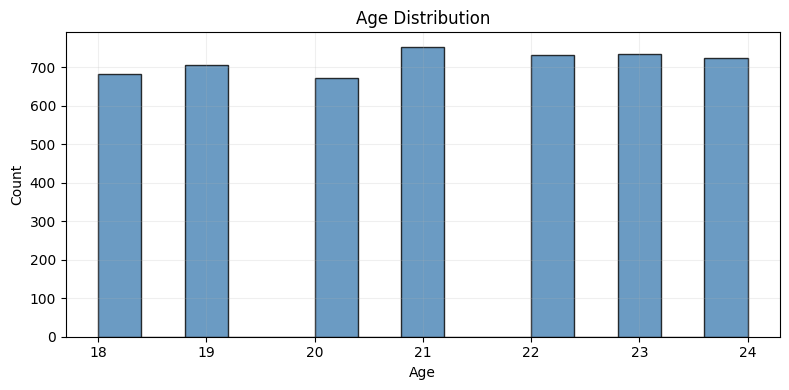

In [37]:
plt.figure(figsize=(8, 4))
plt.hist(my_data['Age'], bins=15, color='steelblue', edgecolor='black', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.grid(alpha=0.2)
plt.tight_layout()

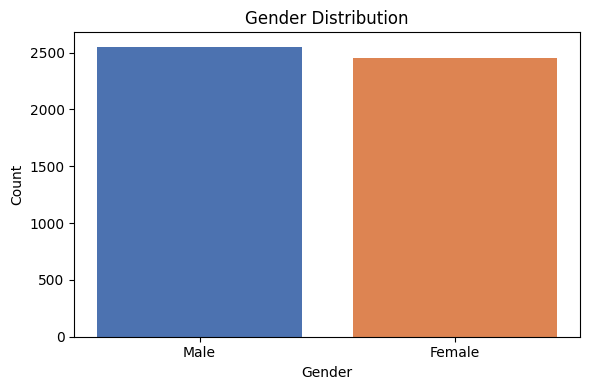

In [38]:
gender_counts = my_data['Gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['#4C72B0', '#DD8452'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.tight_layout()